# Vérification du transposé du gradient de vitesse dansle tenseur des contraintes visqueuses

In [1]:
from trustutils import run 

run.introduction('D. Jamet')

## Introduction 
 Validation made by : D. Jamet



 Report generated 25/01/2022

### Description

On  impose  un  champ  de  vitesse à divergence nulle particulier dans tout le  domaine. On  choisit  une viscosité variable en espace.  Pour ces deux champs, il est possible de déterminer la solution analytique de  la  force  visqueuse.   Cette  force  est  retranchée  sous  la  forme  d’un  terme  source  dans  l’équation  de Navier-Stokes.  La force totale, autre que la force de pression, doit donc être nulle et le champ de pression doit donc être constant.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/EF/EF_Grad_U_Transpose_2D_Source/build)

In [3]:
from trustutils import run 
import os
c1 = run.addCase(".","grad_u_transpose_2d_source.data",nbProcs=1) 
run.printCases()
run.runCases()

### Test cases 
* ./grad_u_transpose_2d_source.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.2s.


## Champ de pression
Dans cette partie, on compare le champ de pression calculé par GENEPI et le champ de pression analytique.
### Champs de pression calculé 
Le champ de pression calculé par GENEPI est tracé et le champ de pression analytique est donné par des isovaleurs.

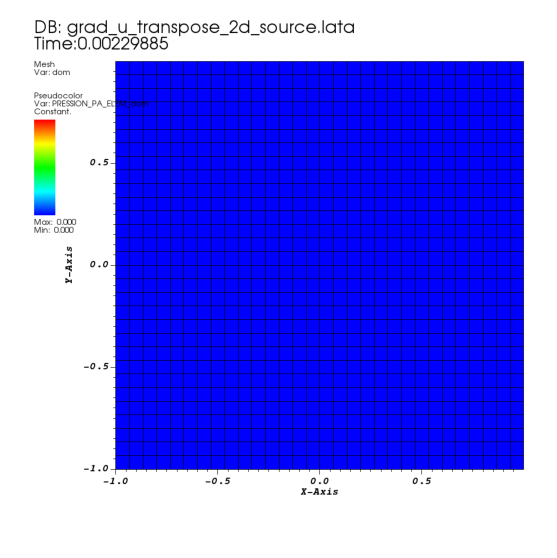

In [4]:
from trustutils import visit

Graphique=visit.showField("./grad_u_transpose_2d_source.lata","Pseudocolor","PRESSION_PA_ELEM_dom") 

## Data Files
### grad_u_transpose_2d_source

In [5]:
from trustutils import run

run.dumpDataset("./grad_u_transpose_2d_source.data")

 # Hydraulique 2D pour tester le grad(u)^T du tenseur visqueux #
 # PARALLEL OK #
 dimension 2
 
 Pb_hydraulique pb
 
 Domaine dom
 # BEGIN MESH #
 Mailler dom
 {
         Pave Cavite
         {
                 Origine -1. -1.
                 Nombre_de_noeuds 31 31
                 Longueurs 2. 2.
         }
         {
                 Bord Gauche   X = -1.  -1. <= Y <= 1.
                 Bord Droit    X =  1.  -1. <= Y <= 1.
                 Bord Bas      Y = -1.  -1. <= X <= 1.
                 Bord Haut     Y =  1.  -1. <= X <= 1.
         }
 }
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 }
 	 
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 EF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 2.5
 	 dt_min 1.e-7
 	 dt_max 5.e-3
 	 dt_impr 5.e-1
 	 dt_sauv 1
 	 seuil_statio 1.e-8
 	 seuil_statio 8.7e-06
 }
 
 Fluide_Incompressible eau
 Read eau
 {
 